In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('CarPrice.csv')
df.shape

(205, 26)

In [8]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [9]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

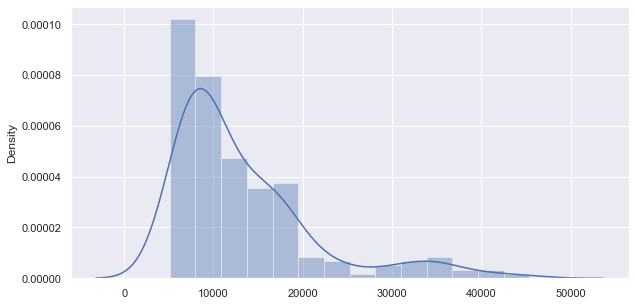

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(x= df['price'])
plt.show()

In [11]:
df.corr().loc[['price'],:]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
price,-0.109093,-0.079978,0.577816,0.68292,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.0


<AxesSubplot:>

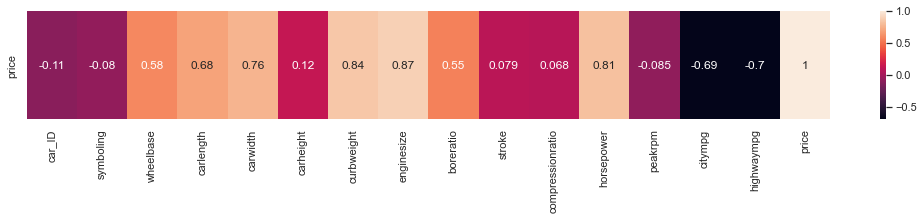

In [12]:
plt.figure(figsize=(18,2))
sns.heatmap(df.corr().loc[['price'],:],annot=True)

In [13]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CarName'])['price'].mean()
temp = temp.merge(table.reset_index(),how='left',on='CarName')
bins = [0,10000,20000,40000]
range_bins = ['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=range_bins)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


In [14]:
df.drop(['car_ID'],axis=1,inplace=True)

In [15]:
df.drop(['symboling'],axis=1,inplace=True)

In [16]:
df.drop(['carheight'],axis=1,inplace=True)

In [17]:
df.drop(['stroke'],axis=1,inplace=True)

In [18]:
df.drop(['compressionratio'],axis=1,inplace=True)

In [19]:
df.drop(['peakrpm'],axis=1,inplace=True)

In [20]:
df['CarName'].unique().shape

(147,)

In [21]:
df['CarName'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [22]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

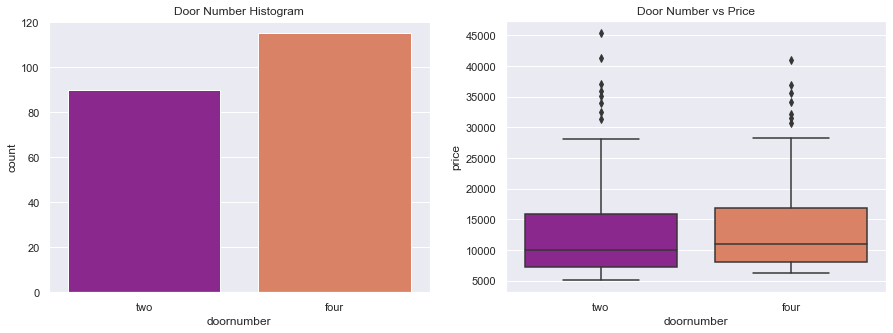

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x = df['doornumber'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df['doornumber'], y=df['price'], palette=("plasma"))

plt.show()

In [24]:
df.drop(['doornumber'],axis=1,inplace=True)
# because doornumber variable is not affecting the price so_much

In [25]:
df.corr().loc[['price'],:]

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
price,0.577816,0.682921,0.759325,0.835305,0.874145,0.553174,0.808138,-0.685752,-0.6976,1.0


In [26]:
# Good Correlation

In [27]:
df['CarName'].nunique()
# we can see some values repeating

28

In [28]:
df['CarName'] = df['CarName'].str.lower()

In [29]:
def replace_name(a,b):
    df['CarName'].replace(a,b,inplace=True)

In [30]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [31]:
df['CarName'].nunique()

22

In [32]:
df

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carsrange
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495,Medium
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500,Medium
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500,Medium
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950,Medium
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845,Medium
201,volvo,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045,Medium
202,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485,Medium
203,volvo,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470,Highend


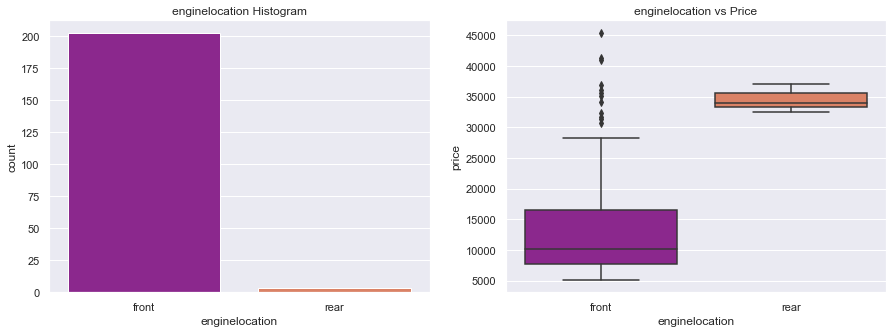

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('enginelocation Histogram')
sns.countplot(x = df['enginelocation'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=df['enginelocation'], y=df['price'], palette=("plasma"))

plt.show()

In [34]:
df.drop(['enginelocation'],axis=1,inplace=True)
# because most of the engines are located in front and only some highend cars have rear engine location which act as outliers

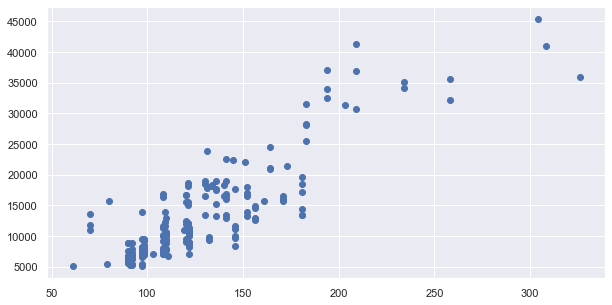

In [35]:
plt.figure(figsize=(10,5))

plt.scatter(df['enginesize'],df['price'])


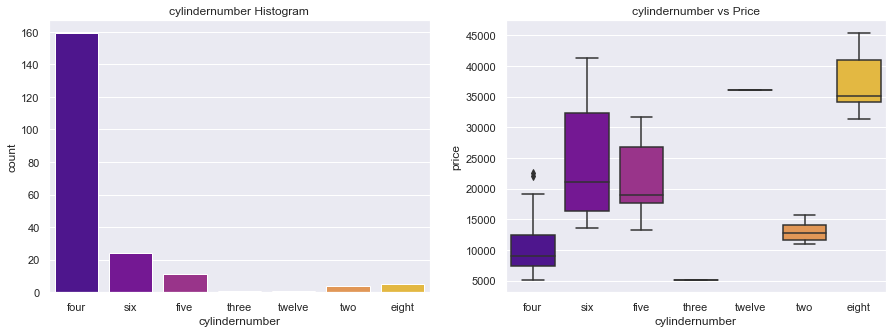

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('cylindernumber Histogram')
sns.countplot(x = df['cylindernumber'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('cylindernumber vs Price')
sns.boxplot(x=df['cylindernumber'], y=df['price'], palette=("plasma"))

plt.show()

In [37]:
df.drop(['cylindernumber'],axis=1,inplace=True)
# bcz very less data points to make any inference

In [38]:
df.drop(['drivewheel'],axis=1,inplace=True)

In [39]:
df

,CarName,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carsrange
0,alfa-romero,gas,std,convertible,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,13495,Medium
1,alfa-romero,gas,std,convertible,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,16500,Medium
2,alfa-romero,gas,std,hatchback,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,19,26,16500,Medium
3,audi,gas,std,sedan,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,24,30,13950,Medium
4,audi,gas,std,sedan,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,18,22,17450,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,109.1,188.8,68.9,2952,ohc,141,mpfi,3.78,114,23,28,16845,Medium
201,volvo,gas,turbo,sedan,109.1,188.8,68.8,3049,ohc,141,mpfi,3.78,160,19,25,19045,Medium
202,volvo,gas,std,sedan,109.1,188.8,68.9,3012,ohcv,173,mpfi,3.58,134,18,23,21485,Medium
203,volvo,diesel,turbo,sedan,109.1,188.8,68.9,3217,ohc,145,idi,3.01,106,26,27,22470,Highend


### Label_Encoding

In [40]:
df['fueltype'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [41]:
df['fueltype'] = df['fueltype'].replace({'gas': 1, 'diesel': 0})

In [42]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [43]:
df['aspiration'] = df['aspiration'].replace({'std': 1, 'turbo': 0})

In [44]:
df.drop(['CarName'],axis=1,inplace=True)

In [45]:
df['carsrange'].value_counts().to_dict()

{'Budget': 102, 'Medium': 77, 'Highend': 23}

In [46]:
df['carsrange'] = df['carsrange'].replace({'Budget': 1, 'Medium': 2, 'Highend': 3})

In [47]:
# df['carsrange'] = df['carsrange'].astype('int')

In [48]:
df['carsrange'].isna().sum()

3

In [49]:
# pd.set_option('display.max_rows', None)
# df['carsrange']

In [50]:
df['carsrange'] = df['carsrange'].replace(np.nan,0)

In [51]:
df['carsrange'].unique()

[2, 3, NaN, 1]
Categories (3, int64): [1 < 2 < 3]

In [52]:
df['carsrange'].isna().sum()

3

In [53]:
df['carsrange'].values

[2, 2, 2, 2, 2, ..., 2, 2, 2, 3, 3]
Length: 205
Categories (3, int64): [1 < 2 < 3]

In [54]:
df = df.drop([df.index[16],df.index[73],df.index[74]])

In [55]:
df['carsrange'].isna().sum()

0

### One Hot Encoding

In [56]:
df

,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carsrange
0,1,1,convertible,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,13495,2
1,1,1,convertible,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,16500,2
2,1,1,hatchback,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,19,26,16500,2
3,1,1,sedan,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,24,30,13950,2
4,1,1,sedan,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,18,22,17450,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,sedan,109.1,188.8,68.9,2952,ohc,141,mpfi,3.78,114,23,28,16845,2
201,1,0,sedan,109.1,188.8,68.8,3049,ohc,141,mpfi,3.78,160,19,25,19045,2
202,1,1,sedan,109.1,188.8,68.9,3012,ohcv,173,mpfi,3.58,134,18,23,21485,2
203,0,0,sedan,109.1,188.8,68.9,3217,ohc,145,idi,3.01,106,26,27,22470,3


In [57]:
df = pd.get_dummies(df,columns=['carbody'])
df

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,carsrange,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,1,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,13495,2,1,0,0,0,0
1,1,1,88.6,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,16500,2,1,0,0,0,0
2,1,1,94.5,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,19,26,16500,2,0,0,1,0,0
3,1,1,99.8,176.6,66.2,2337,ohc,109,mpfi,3.19,102,24,30,13950,2,0,0,0,1,0
4,1,1,99.4,176.6,66.4,2824,ohc,136,mpfi,3.19,115,18,22,17450,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,109.1,188.8,68.9,2952,ohc,141,mpfi,3.78,114,23,28,16845,2,0,0,0,1,0
201,1,0,109.1,188.8,68.8,3049,ohc,141,mpfi,3.78,160,19,25,19045,2,0,0,0,1,0
202,1,1,109.1,188.8,68.9,3012,ohcv,173,mpfi,3.58,134,18,23,21485,2,0,0,0,1,0
203,0,0,109.1,188.8,68.9,3217,ohc,145,idi,3.01,106,26,27,22470,3,0,0,0,1,0


In [58]:
df['enginetype'].value_counts()

ohc      147
ohcf      15
dohc      12
l         12
ohcv      11
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<AxesSubplot:xlabel='enginetype', ylabel='count'>

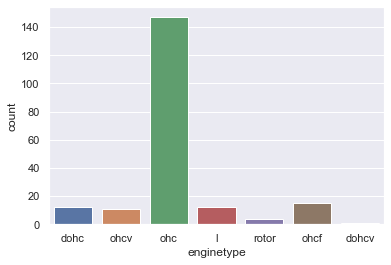

In [59]:
sns.countplot(df['enginetype'])

In [60]:
df['fuelsystem'].value_counts()

mpfi    91
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [61]:
df.drop(['fuelsystem'],axis=1,inplace=True)

In [62]:
df = pd.get_dummies(df,columns=['enginetype'])
df

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,...,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,1,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,1,0,0,0,0,0,0
1,1,1,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,1,0,0,0,0,0,0
2,1,1,94.5,171.2,65.5,2823,152,2.68,154,19,...,1,0,0,0,0,0,0,0,1,0
3,1,1,99.8,176.6,66.2,2337,109,3.19,102,24,...,0,1,0,0,0,0,1,0,0,0
4,1,1,99.4,176.6,66.4,2824,136,3.19,115,18,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,109.1,188.8,68.9,2952,141,3.78,114,23,...,0,1,0,0,0,0,1,0,0,0
201,1,0,109.1,188.8,68.8,3049,141,3.78,160,19,...,0,1,0,0,0,0,1,0,0,0
202,1,1,109.1,188.8,68.9,3012,173,3.58,134,18,...,0,1,0,0,0,0,0,0,1,0
203,0,0,109.1,188.8,68.9,3217,145,3.01,106,26,...,0,1,0,0,0,0,1,0,0,0


In [63]:
df.head().T

,0,1,2,3,4
fueltype,1.00,1.00,1.00,1.00,1.00
aspiration,1.00,1.00,1.00,1.00,1.00
wheelbase,88.60,88.60,94.50,99.80,99.40
carlength,168.80,168.80,171.20,176.60,176.60
carwidth,64.10,64.10,65.50,66.20,66.40
curbweight,2548.00,2548.00,2823.00,2337.00,2824.00
enginesize,130.00,130.00,152.00,109.00,136.00
boreratio,3.47,3.47,2.68,3.19,3.19
horsepower,111.00,111.00,154.00,102.00,115.00
citympg,21.00,21.00,19.00,24.00,18.00


In [64]:
x = df.drop(['price'],axis=1)
y = df['price']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=365)

In [66]:
# x_train

In [67]:
# x_test

In [68]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Test data evaluation

In [69]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
print('MSE: ',mse)

rmse = np.sqrt(mse)
print("RMSE: ",rmse)

mae = mean_absolute_error(y_pred,y_test)
print("MAE: ",mae)

r_squared = r2_score(y_pred,y_test)
print("R_Squared: ", r_squared)

MSE:  6955076.743583213
RMSE:  2637.2479488252925
MAE:  1827.1706482069353
R_Squared:  0.8394639021697936


### Train data evaluation

In [70]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_square = r2_score(y_train, y_pred_train)
print('R_Squared value:',r_square)

MSE : 4316117.799693288
RMSE : 2077.5268469247967
MAE : 1563.3255111745145
R_Squared value: 0.9126427285007868


### Testing on single row

In [71]:
x.head(2)

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,...,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,1,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,1,0,0,0,0,0,0
1,1,1,88.6,168.8,64.1,2548,130,3.47,111,21,...,0,0,0,1,0,0,0,0,0,0


In [72]:
x.columns

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'carsrange', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

In [73]:
fueltype = 'gas'
aspiration = 'std'
wheelbase = 85
carlength = 165
carwidth = 64
curbweight = 2600
enginesize = 135
boreratio = 3.1
horsepower = 140
citympg = 21
highwaympg = 24
carsrange = 'Medium'
carbody = 'sedan'
enginetype = 'ohcv'

In [74]:
# For label encoded data:
project_data = {'fueltype': {'gas': 1, 'diesel': 0},
               'aspiration': {'std': 1, 'turbo': 0},
               'carsrange': {'Budget': 1, 'Medium': 2, 'Highend': 3},
               'columns': list(x.columns)}

In [75]:
# For one hot encoded data
carbody = 'carbody_' + carbody
carbody_index = np.where(x.columns==carbody)[0][0]
carbody_index

enginetype = 'enginetype_' + enginetype
enginetype_index = np.where(x.columns==enginetype)[0][0]
enginetype_index

22

In [76]:
test_array = np.zeros(x.shape[1],dtype=int)

test_array[0] = project_data['fueltype'][fueltype]
test_array[1] = project_data['aspiration'][aspiration]
test_array[2] = wheelbase
test_array[3] = carlength
test_array[4] = carwidth
test_array[5] = curbweight
test_array[6] = enginesize
test_array[7] = boreratio
test_array[8] = horsepower
test_array[9] = citympg
test_array[10] = highwaympg
test_array[11] = project_data['carsrange'][carsrange]
test_array[carbody_index] = 1
test_array[enginetype_index] =1

In [77]:
test_array

array([   1,    1,   85,  165,   64, 2600,  135,    3,  140,   21,   24,
          2,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          1,    0])

### Predict result

In [78]:
model.predict([test_array])

array([11709.0922988])

### Dump Data

In [79]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [80]:
with open('Project_data.json','w') as f:
    json.dump(project_data,f)

In [2]:
import numpy as np

list1 = [1,2,3]
arr = np.array(list1)
arr

array([1, 2, 3])

In [4]:
arr[0]

1

In [5]:
list1 = [1,2,3]
list1[1]

2

In [8]:
dict1 = {1:1,2:4,3:9}
list2 = list(dict1.values())
list2[1]

4